In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from experiment import Experiment

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC


In [2]:
df=pd.read_csv("data/HREmployeeAttrition.csv")
nominal_columns=['Department','EducationField','JobRole','MaritalStatus','Gender']
useless_columns=['Over18','EmployeeNumber','EmployeeCount']
yesno_columns=['Attrition','OverTime']
ordinal_columns={'BusinessTravel':['Non-Travel','Travel_Rarely','Travel_Frequently']}

for col in nominal_columns:
    vals=df[col].unique()
    for v in vals:
        new_colname=f'{col}_{v}'
        df[new_colname]=df[col].apply(lambda x: 1 if x==v else 0)
df=df.drop(columns=nominal_columns)

df=df.drop(columns=useless_columns)

for col in yesno_columns:
    df[col]=df[col].apply(lambda x: 1 if x=="Yes" else 0)

for col in ordinal_columns:
    mapping=dict()
    for v in range(len(ordinal_columns[col])):
        mapping[ordinal_columns[col][v]]=v

    df[col]=df[col].apply(lambda x: mapping[x])

df.to_csv('data/HREmployeeAttrition_encoded.csv')

# Import Data

In [3]:
exp=Experiment("data/HREmployeeAttrition_encoded.csv",'Attrition',scoring='f1_macro',random_state=4,drop_cols=['Unnamed: 0'])

exp.preprocess(Pipeline(steps=[('ss',StandardScaler())]))

           count  percentage
Attrition                   
0           1233    0.838776
1            237    0.161224


# Decision Trees

Tuning max depth. Looks like after 3 validation score gets worse.

Tuning <class 'sklearn.tree._classes.DecisionTreeClassifier'>
---------------------------------
Parameter Name: max_depth
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameter: 
	{'max_depth': 3}
Best score: 0.652


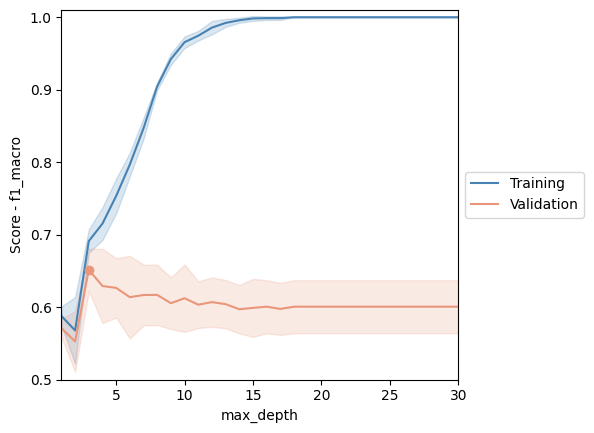

In [4]:
dt_gs_depth,ax=exp.tune_parameter(DecisionTreeClassifier(class_weight='balanced'),'max_depth',np.arange(1,31))


In this tree, what are the most important features? Note, there's not that many.

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'DistanceFromHome', 'Education', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction',
       'Gender_Female', 'Gender_Male', 'HourlyRate', 'JobInvolvement',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Representative',
       'JobSatisfaction', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'Standar

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09691189,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01643052, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04615883, 0.        , 0.        , 0.        ,
        0.        , 0.03032425, 0.        , 0.        , 0.        ,
        0.01774362, 0.        , 0.        , 0.        ]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

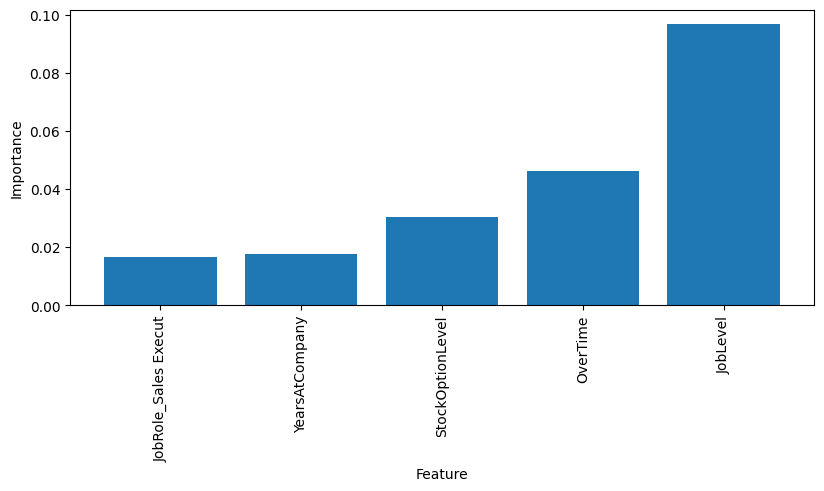

In [5]:
exp.perm_ft_importance(dt_gs_depth.best_estimator_)

Tuning impurity decrease requirement. Restricting this a little bit helps with overfitting. Restricting it too much doesn't let the tree train.

Tuning <class 'sklearn.tree._classes.DecisionTreeClassifier'>
---------------------------------
Parameter Name: min_impurity_decrease
Parameter values: [0.         0.00208333 0.00416667 0.00625    0.00833333 0.01041667
 0.0125     0.01458333 0.01666667 0.01875    0.02083333 0.02291667
 0.025      0.02708333 0.02916667 0.03125    0.03333333 0.03541667
 0.0375     0.03958333 0.04166667 0.04375    0.04583333 0.04791667
 0.05      ]
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameter: 
	{'min_impurity_decrease': 0.0125}
Best score: 0.643


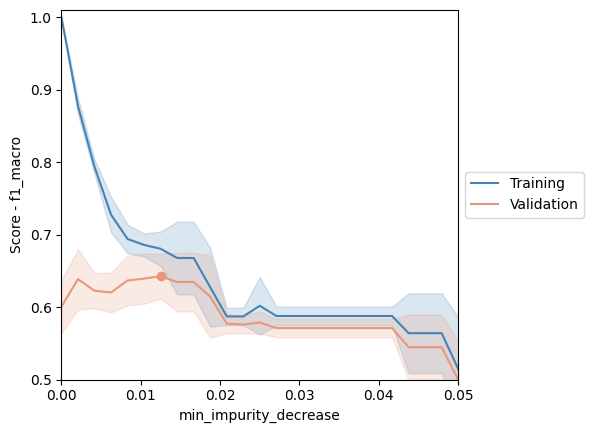

In [17]:
dt_gs_impurity,ax=exp.tune_parameter(DecisionTreeClassifier(class_weight='balanced'),
    'min_impurity_decrease',np.linspace(0,0.05,25))


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'DistanceFromHome', 'Education', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction',
       'Gender_Female', 'Gender_Male', 'HourlyRate', 'JobInvolvement',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Representative',
       'JobSatisfaction', 'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'Standar

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09691189,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01643052, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04615883, 0.        , 0.        , 0.        ,
        0.        , 0.03032425, 0.        , 0.        , 0.        ,
        0.01774362, 0.        , 0.        , 0.        ]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

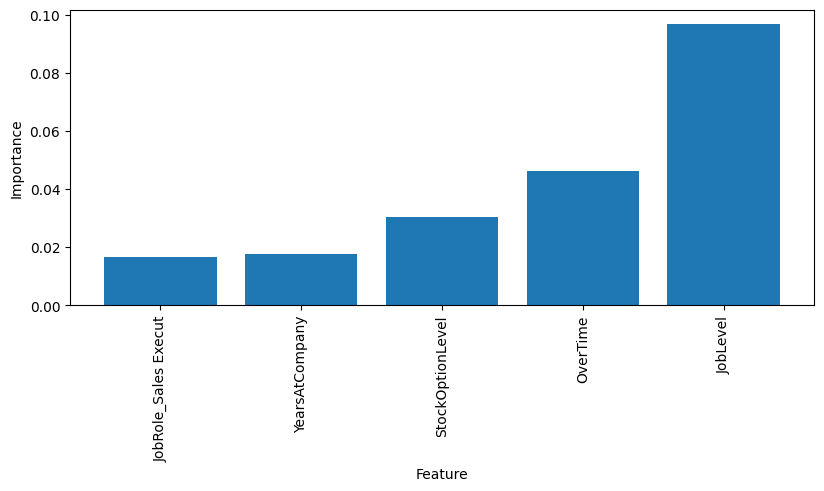

In [7]:
exp.perm_ft_importance(dt_gs_impurity.best_estimator_)

Combine the two tuned parameters

Fitting type(estimator)
--------------------------------------------------
Fit time: 0.003
Score time: 0.000
Final scores (f1_macro):
	 Training 0.689
	 Validation 0.658
Classification report:
              precision    recall  f1-score   support

           0      0.911     0.815     0.860       925
           1      0.376     0.582     0.457       177

    accuracy                          0.778      1102
   macro avg      0.643     0.699     0.659      1102
weighted avg      0.825     0.778     0.795      1102



({'train_sizes': array([ 88, 176, 264, 352, 440, 528, 616, 704, 792, 881]),
  'train_scores': array([[0.95487179, 0.82511292, 0.79996503, 0.81772991, 0.72231405],
         [0.78588808, 0.72571429, 0.67057292, 0.76919042, 0.67746715],
         [0.6969697 , 0.62969552, 0.617866  , 0.77210233, 0.71275527],
         [0.6134902 , 0.69244041, 0.6872779 , 0.74034706, 0.66147928],
         [0.71129262, 0.65665818, 0.67810787, 0.74018659, 0.68279686],
         [0.66161616, 0.66763458, 0.60526949, 0.65997424, 0.6768745 ],
         [0.68236143, 0.71556474, 0.60881438, 0.6454308 , 0.68312757],
         [0.70611427, 0.71770839, 0.69490282, 0.60758477, 0.70836785],
         [0.70019024, 0.72077958, 0.66965773, 0.67678813, 0.67373885],
         [0.68990872, 0.71327143, 0.69468891, 0.67518621, 0.67349347]]),
  'test_scores': array([[0.56339799, 0.49596491, 0.51203483, 0.55697154, 0.5489019 ],
         [0.65562331, 0.53476331, 0.57378108, 0.55010225, 0.54675585],
         [0.54912116, 0.58027421, 0.533

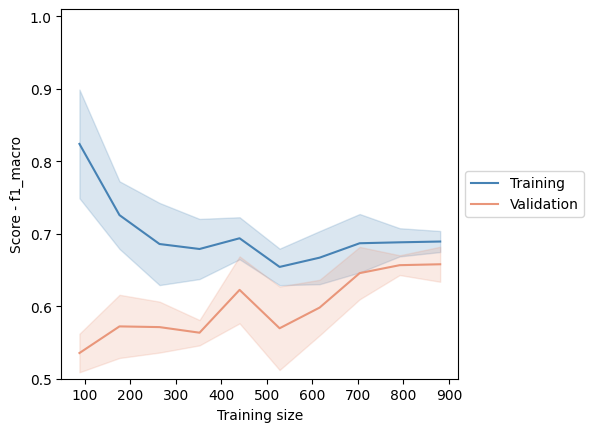

In [18]:
exp.learning_cv(DecisionTreeClassifier(class_weight='balanced',max_depth=3,min_impurity_decrease=0.0125))

Obviosuly some learning going on. More data might let us make stricter parameters. Right now the validation is returning a range of scores. Not overfitting because there's probably not even enough data.

              precision    recall  f1-score   support

           0      0.908     0.769     0.833       308
           1      0.336     0.600     0.431        60

    accuracy                          0.742       368
   macro avg      0.622     0.685     0.632       368
weighted avg      0.815     0.742     0.768       368



{'score': 0.6320890731717584,
 'fit_time': 0.004380941390991211,
 'params': {'ccp_alpha': 0.0,
  'class_weight': 'balanced',
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0125,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': 4,
  'splitter': 'best'},
 'conf_matr': array([[237,  71],
        [ 24,  36]]),
 'class_rep': {'0': {'precision': 0.9080459770114943,
   'recall': 0.7694805194805194,
   'f1-score': 0.8330404217926186,
   'support': 308},
  '1': {'precision': 0.3364485981308411,
   'recall': 0.6,
   'f1-score': 0.4311377245508982,
   'support': 60},
  'accuracy': 0.7418478260869565,
  'macro avg': {'precision': 0.6222472875711677,
   'recall': 0.6847402597402596,
   'f1-score': 0.6320890731717584,
   'support': 368},
  'weighted avg': {'precision': 0.8148507521939965,
   'recall': 0.7418478260869565,
   'f1-score': 0.7675128081119034,
   'support': 368}

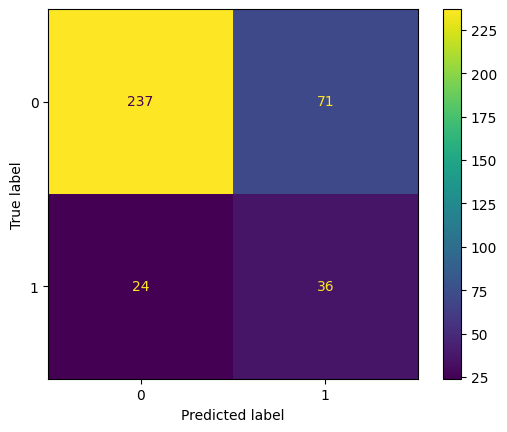

In [9]:
exp.final_test('Decision Tree',DecisionTreeClassifier(class_weight='balanced',max_depth=3,min_impurity_decrease=0.0125))

# Neural Nets

Evaluating number of nodes in a single layer

Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter: 
	{'hidden_layer_sizes': 9}
Best score: 0.708
Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter: 
	{'hidden_layer_sizes': 3}
Best score: 0.731
Tuning <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
---------------------------------
Parameter Name: hidden_layer_sizes
Parameter values: [ 1  2  3  4  5  6  7  8  9 10]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter: 
	{'hidden_layer_sizes': 1}
Best score: 0.730
Tuning <class 'sklearn.neural_network._mult

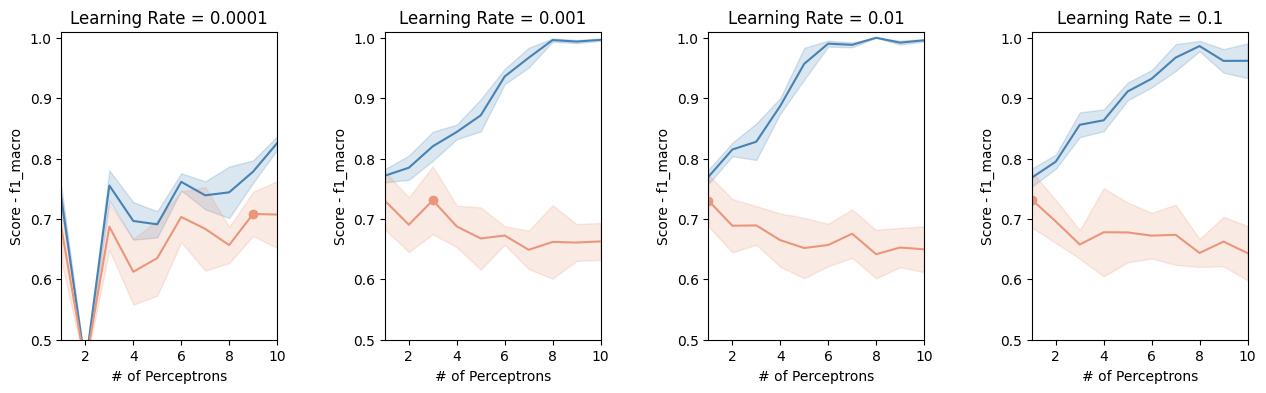

In [10]:
fig,axs=plt.subplots(1,4,figsize=(16,4))
param_range=np.arange(1,11)
lr=[1e-4,1e-3,1e-2,1e-1]
for ax,l in zip(axs,lr):
    gs_1lyr,_=exp.tune_parameter(
    MLPClassifier(learning_rate_init=l,max_iter=10000),'hidden_layer_sizes',param_range,plot=False)
    exp.plot_validation('# of Perceptrons',param_range,gs_1lyr.cv_results_,ax)

    ax.get_legend().remove()
    ax.set_title(f'Learning Rate = {l}')
    


Lower learning rate: lots of variance, network isn't learned. At 0.001, network is learned and keeping the # of perceptrons low prevents bias. At higher learning rates, the validation score drops quickly with the # of perceptrons. The happy medium is 0.001 with 3 nodes. 

Loss curve in place of learning curve. Looks like learning rate is fine. Doesn't say much about overfitting... naturally. Note that max iters was increased so that tolerance can be reached.

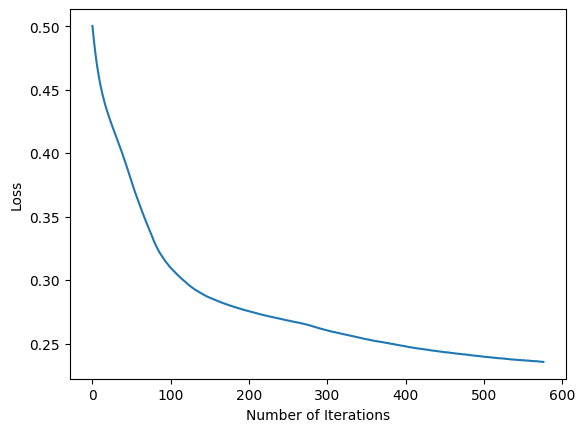

In [11]:
nn_opt=MLPClassifier(hidden_layer_sizes=3,learning_rate_init=0.001,max_iter=1000)
nn_opt.fit(exp.X_train,exp.y_train)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.plot(nn_opt.loss_curve_)


Index(['StandardHours'], dtype='object')


(array([0.02611451, 0.02832108, 0.01735355, 0.00088895, 0.00208646,
        0.00645114, 0.02468373, 0.00795361, 0.00456707, 0.0141003 ,
        0.00882018, 0.02181827, 0.00044152, 0.00658678, 0.03909155,
        0.00332069, 0.0138863 , 0.002199  , 0.01640944, 0.00425321,
        0.00157557, 0.0137912 , 0.02458493, 0.00210436, 0.01279914,
        0.01172591, 0.00872706, 0.00431066, 0.00576405, 0.05257588,
        0.00454287, 0.01179175, 0.02548568, 0.03073892, 0.00950971,
        0.01658925, 0.09853735, 0.01718001, 0.01017932, 0.02487719,
        0.        , 0.00787126, 0.05767429, 0.02306217, 0.01533566,
        0.01964655, 0.05357585, 0.01335176, 0.01438466]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

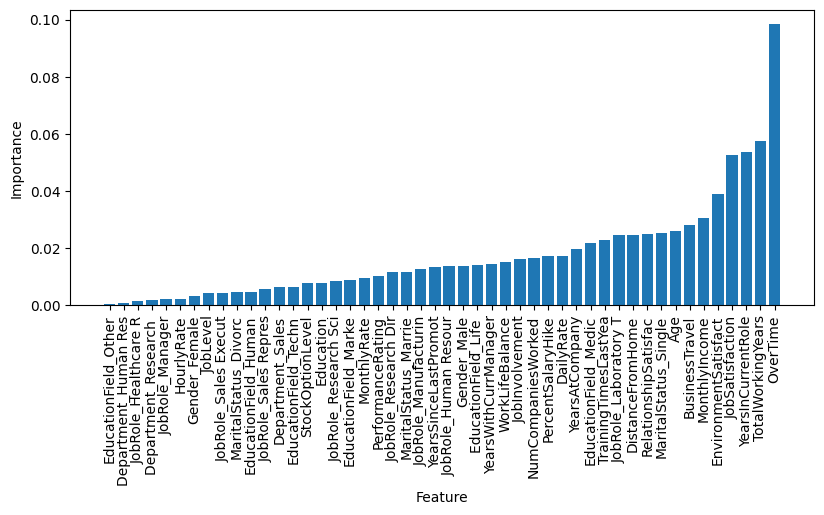

In [12]:
exp.perm_ft_importance(nn_opt)

              precision    recall  f1-score   support

           0      0.905     0.964     0.934       308
           1      0.725     0.483     0.580        60

    accuracy                          0.886       368
   macro avg      0.815     0.724     0.757       368
weighted avg      0.876     0.886     0.876       368



{'score': 0.7569811320754718,
 'fit_time': 0.37249088287353516,
 'params': {'activation': 'relu',
  'alpha': 0.0001,
  'batch_size': 'auto',
  'beta_1': 0.9,
  'beta_2': 0.999,
  'early_stopping': False,
  'epsilon': 1e-08,
  'hidden_layer_sizes': 3,
  'learning_rate': 'constant',
  'learning_rate_init': 0.001,
  'max_fun': 15000,
  'max_iter': 1000,
  'momentum': 0.9,
  'n_iter_no_change': 10,
  'nesterovs_momentum': True,
  'power_t': 0.5,
  'random_state': 4,
  'shuffle': True,
  'solver': 'adam',
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': False,
  'warm_start': False},
 'conf_matr': array([[297,  11],
        [ 31,  29]]),
 'class_rep': {'0': {'precision': 0.9054878048780488,
   'recall': 0.9642857142857143,
   'f1-score': 0.9339622641509435,
   'support': 308},
  '1': {'precision': 0.725,
   'recall': 0.48333333333333334,
   'f1-score': 0.58,
   'support': 60},
  'accuracy': 0.8858695652173914,
  'macro avg': {'precision': 0.8152439024390243,
   'recall': 0.723809

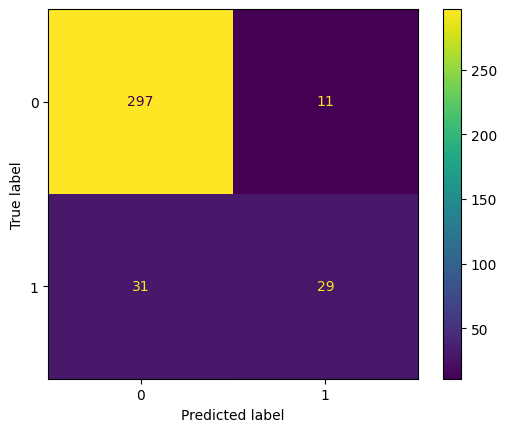

In [13]:
exp.final_test('Neural Nets',MLPClassifier(hidden_layer_sizes=3,learning_rate_init=0.001,max_iter=1000))

# Boosted

Tuning <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
---------------------------------
Parameter Name: n_estimators
Parameter values: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameter: 
	{'n_estimators': 71}
Best score: 0.713


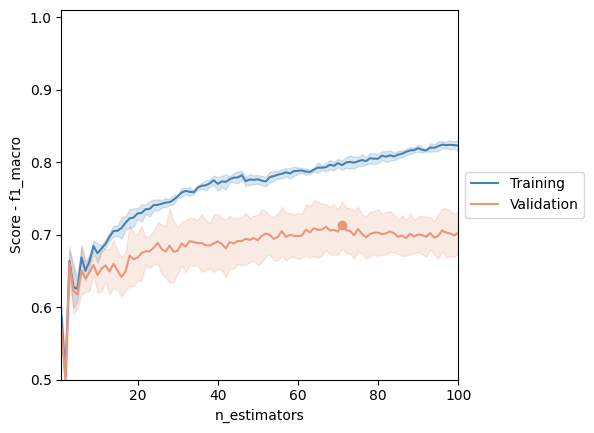

In [14]:
gs_boost,_=exp.tune_parameter(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,class_weight='balanced')),'n_estimators',np.arange(1,101))


Tuning <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
---------------------------------
Parameter Name: base_estimator__max_depth
Parameter values: [ 1  2  3  4  5  6  7  8  9 10]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter: 
	{'base_estimator__max_depth': 1}
Best score: 0.713


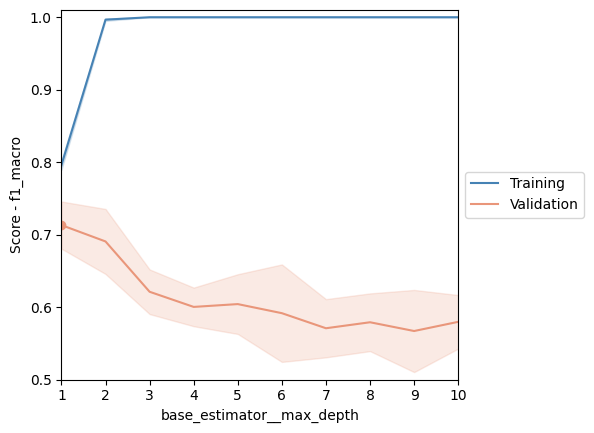

In [15]:
exp.tune_parameter(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,class_weight='balanced'),n_estimators=71),'base_estimator__max_depth',np.arange(1,11))
plt.show()

Index(['Department_Human Resources', 'Department_Sales', 'Education',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other', 'Gender_Female',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'PerformanceRating', 'StandardHours',
       'TotalWorkingYears'],
      dtype='object')


(array([0.02817754, 0.02104713, 0.00983319, 0.        , 0.00983656,
        0.        , 0.01337989, 0.        , 0.        , 0.        ,
        0.00028593, 0.        , 0.        , 0.00564218, 0.02304009,
        0.        , 0.        , 0.00029899, 0.00658185, 0.01345503,
        0.        , 0.        , 0.00357379, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.02866832,
        0.00315214, 0.        , 0.        , 0.03453898, 0.01299731,
        0.01762934, 0.05991129, 0.00528257, 0.        , 0.01101477,
        0.        , 0.01876159, 0.        , 0.00674185, 0.01100235,
        0.02547255, 0.00585928, 0.01233462, 0.01692473]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

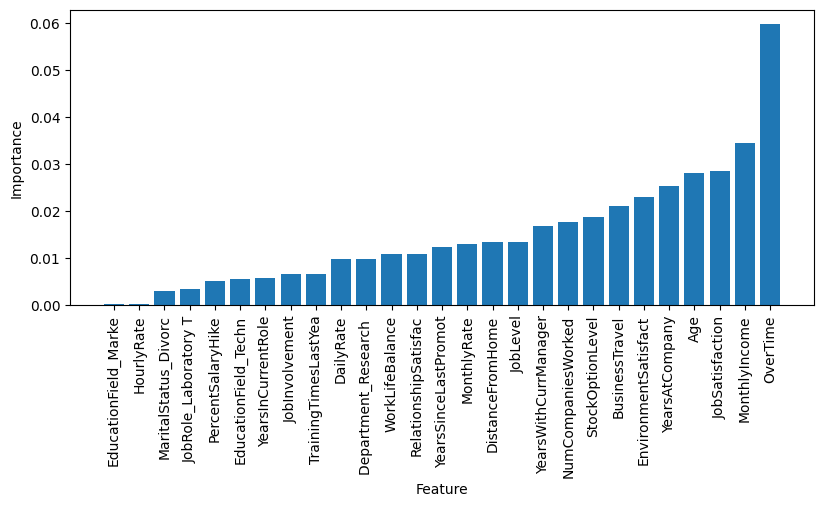

In [16]:
exp.perm_ft_importance(gs_boost.best_estimator_)

Fitting type(estimator)
--------------------------------------------------
Fit time: 0.189
Score time: 0.009
Final scores (f1_macro):
	 Training 0.804
	 Validation 0.702
Classification report:
              precision    recall  f1-score   support

           0      0.934     0.838     0.883       925
           1      0.449     0.689     0.543       177

    accuracy                          0.814      1102
   macro avg      0.691     0.764     0.713      1102
weighted avg      0.856     0.814     0.829      1102



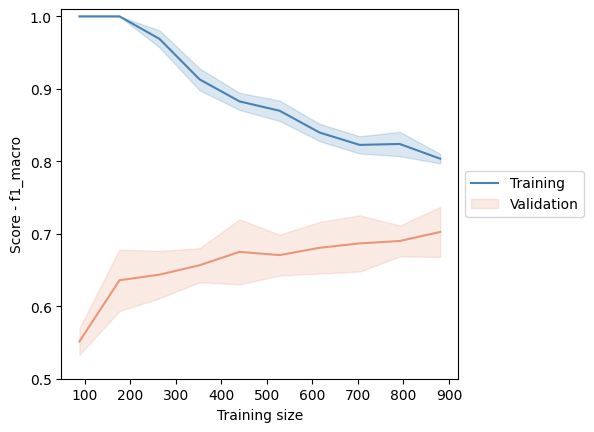

In [17]:
exp.learning_cv(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,class_weight='balanced'),n_estimators=71))

plt.show()

              precision    recall  f1-score   support

           0      0.939     0.847     0.891       308
           1      0.478     0.717     0.573        60

    accuracy                          0.826       368
   macro avg      0.708     0.782     0.732       368
weighted avg      0.864     0.826     0.839       368



{'score': 0.7320591581342435,
 'fit_time': 0.165269136428833,
 'params': {'algorithm': 'SAMME.R',
  'base_estimator__ccp_alpha': 0.0,
  'base_estimator__class_weight': 'balanced',
  'base_estimator__criterion': 'gini',
  'base_estimator__max_depth': 1,
  'base_estimator__max_features': None,
  'base_estimator__max_leaf_nodes': None,
  'base_estimator__min_impurity_decrease': 0.0,
  'base_estimator__min_samples_leaf': 1,
  'base_estimator__min_samples_split': 2,
  'base_estimator__min_weight_fraction_leaf': 0.0,
  'base_estimator__random_state': None,
  'base_estimator__splitter': 'best',
  'base_estimator': DecisionTreeClassifier(class_weight='balanced', max_depth=1),
  'learning_rate': 1.0,
  'n_estimators': 71,
  'random_state': 4},
 'conf_matr': array([[261,  47],
        [ 17,  43]]),
 'class_rep': {'0': {'precision': 0.9388489208633094,
   'recall': 0.8474025974025974,
   'f1-score': 0.8907849829351536,
   'support': 308},
  '1': {'precision': 0.4777777777777778,
   'recall': 0.71

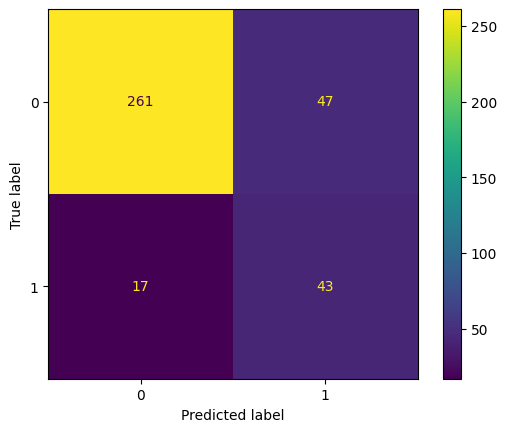

In [18]:
exp.final_test('Boosting',AdaBoostClassifier(DecisionTreeClassifier(max_depth=1,class_weight='balanced'),n_estimators=71))

# SVMs

In [4]:
gs_linear,ax=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='linear',class_weight='balanced'),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=False
)

Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits


/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/dle/homebrew/Caskroom/miniconda/base/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameter: 
	{'C': 0.01}
Best score: 0.682


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 1.584893192461114}
Best score: 0.715


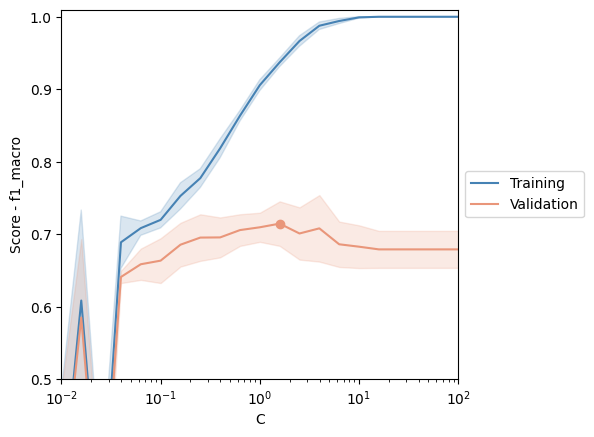

In [6]:
gs_rbf,ax=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e6,tol=1e-6,kernel='rbf',class_weight='balanced'),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=True
)


In [8]:
C_range=np.logspace(-1,4,25)
gamma_range=np.logspace(-4,1,25)
gs_rbf_C_gam=exp.tune_multiple_parameters(SVC(cache_size=1000,kernel='rbf',tol=1e-3,max_iter=1e6,class_weight='balanced'),
    {'C':C_range,
    'gamma':gamma_range})


Grid search tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-01 1.61559810e-01 2.61015722e-01 4.21696503e-01
 6.81292069e-01 1.10069417e+00 1.77827941e+00 2.87298483e+00
 4.64158883e+00 7.49894209e+00 1.21152766e+01 1.95734178e+01
 3.16227766e+01 5.10896977e+01 8.25404185e+01 1.33352143e+02
 2.15443469e+02 3.48070059e+02 5.62341325e+02 9.08517576e+02
 1.46779927e+03 2.37137371e+03 3.83118685e+03 6.18965819e+03
 1.00000000e+04]
Parameter Name: gamma
Parameter values: [1.00000000e-04 1.61559810e-04 2.61015722e-04 4.21696503e-04
 6.81292069e-04 1.10069417e-03 1.77827941e-03 2.87298483e-03
 4.64158883e-03 7.49894209e-03 1.21152766e-02 1.95734178e-02
 3.16227766e-02 5.10896977e-02 8.25404185e-02 1.33352143e-01
 2.15443469e-01 3.48070059e-01 5.62341325e-01 9.08517576e-01
 1.46779927e+00 2.37137371e+00 3.83118685e+00 6.18965819e+00
 1.00000000e+01]
Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best p

{'C': 0.1, 'gamma': 0.0001}
0.13838406958113983
{'C': 0.1, 'gamma': 0.00016155980984398745}
0.13838406958113983
{'C': 0.1, 'gamma': 0.0002610157215682536}
0.13838406958113983
{'C': 0.1, 'gamma': 0.00042169650342858224}
0.13838406958113983
{'C': 0.1, 'gamma': 0.0006812920690579615}
0.15858243309077233
{'C': 0.1, 'gamma': 0.0011006941712522103}
0.428600835281647
{'C': 0.1, 'gamma': 0.0017782794100389228}
0.5800729139283589
{'C': 0.1, 'gamma': 0.0028729848333536655}
0.6181708172280883
{'C': 0.1, 'gamma': 0.004641588833612782}
0.6374296278028716
{'C': 0.1, 'gamma': 0.007498942093324558}
0.6559280587647347
{'C': 0.1, 'gamma': 0.012115276586285889}
0.6701691446148483
{'C': 0.1, 'gamma': 0.019573417814876617}
0.6618937390897661
{'C': 0.1, 'gamma': 0.03162277660168379}
0.669301698227191
{'C': 0.1, 'gamma': 0.051089697745069294}
0.6753450175988467
{'C': 0.1, 'gamma': 0.0825404185268019}
0.1395674131242975
{'C': 0.1, 'gamma': 0.1333521432163324}
0.2646189510286873
{'C': 0.1, 'gamma': 0.215443469

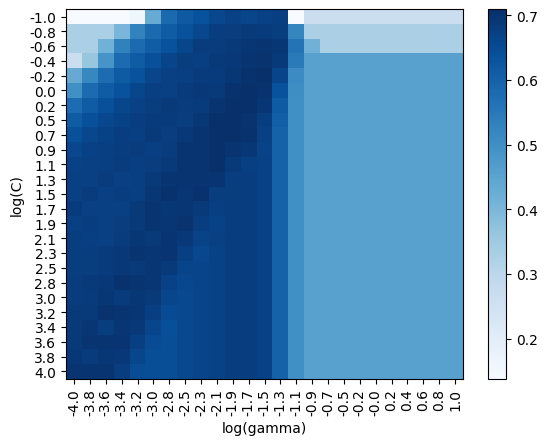

In [9]:
test_scores=np.ndarray((C_range.shape[0],gamma_range.shape[0]))
train_scores=np.ndarray((C_range.shape[0],gamma_range.shape[0]))

for p,test_score,train_score in zip(gs_rbf_C_gam.cv_results_['params'],gs_rbf_C_gam.cv_results_['mean_test_score'],gs_rbf_C_gam.cv_results_['mean_train_score']):
    print(p)
    print(test_score)
    i=np.where(C_range==p['C'])
    j=np.where(gamma_range==p['gamma'])
    test_scores[i,j]=test_score
    train_scores[i,j]=train_score

fig,ax=plt.subplots()

im=ax.imshow(test_scores,cmap='Blues',aspect='auto')
fig.colorbar(im)

ax.set_yticks(ticks=np.arange(0,C_range.shape[0]),labels=[f'{a:0.1f}' for a in np.log10(C_range)])
ax.set_xticks(ticks=np.arange(0,gamma_range.shape[0]),labels=[f'{a:0.1f}' for a in np.log10(gamma_range)],rotation=90)


ax.set_ylabel('log(C)')
ax.set_xlabel('log(gamma)')

plt.show()

In [10]:
gs_sigmoid,ax=exp.tune_parameter(
    estimator=SVC(cache_size=1000,tol=1e-6,kernel='sigmoid',class_weight='balanced'),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=False
)


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.6309573444801934}
Best score: 0.673


In [11]:
gs_poly2,_=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='poly',degree=2,class_weight='balanced'),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=False
)


Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.3981071705534973}
Best score: 0.634


In [12]:
gs_poly3,_=exp.tune_parameter(
    estimator=SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='poly',degree=3,class_weight='balanced'),
    param_name='C',param_range=np.logspace(-2,2,21),semi_logx=True,
    plot=False
)

Tuning <class 'sklearn.svm._classes.SVC'>
---------------------------------
Parameter Name: C
Parameter values: [1.00000000e-02 1.58489319e-02 2.51188643e-02 3.98107171e-02
 6.30957344e-02 1.00000000e-01 1.58489319e-01 2.51188643e-01
 3.98107171e-01 6.30957344e-01 1.00000000e+00 1.58489319e+00
 2.51188643e+00 3.98107171e+00 6.30957344e+00 1.00000000e+01
 1.58489319e+01 2.51188643e+01 3.98107171e+01 6.30957344e+01
 1.00000000e+02]
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameter: 
	{'C': 0.3981071705534973}
Best score: 0.704


In [13]:
gs_sigmoid.cv_results_['mean_train_score'][np.argmax(gs_sigmoid.cv_results_['mean_test_score'])]

0.6492353312501312

Fitting type(estimator)
--------------------------------------------------
Fit time: 0.050
Score time: 0.037
Final scores (f1_macro):
	 Training 0.937
	 Validation 0.715
Classification report:
              precision    recall  f1-score   support

           0      0.906     0.918     0.912       925
           1      0.539     0.503     0.520       177

    accuracy                          0.851      1102
   macro avg      0.723     0.710     0.716      1102
weighted avg      0.847     0.851     0.849      1102



({'train_sizes': array([ 88, 176, 264, 352, 440, 528, 616, 704, 792, 881]),
  'train_scores': array([[0.95752896, 1.        , 0.96180556, 1.        , 1.        ],
         [0.94270833, 0.9774359 , 0.96859946, 1.        , 0.96270396],
         [0.94025197, 0.97935726, 0.98683686, 0.98726852, 0.95648796],
         [0.9469112 , 0.96945682, 0.96637509, 0.99033339, 0.96133355],
         [0.95702957, 0.95702957, 0.95196143, 0.98339372, 0.96023713],
         [0.95752896, 0.94815363, 0.94865686, 0.95431961, 0.94948214],
         [0.95407697, 0.94794171, 0.94983986, 0.95407697, 0.94210293],
         [0.94708491, 0.94558975, 0.94126808, 0.95275084, 0.94353604],
         [0.94126808, 0.93368178, 0.94126808, 0.94764617, 0.94704407],
         [0.93736781, 0.92883761, 0.93268423, 0.94519684, 0.94128232]]),
  'test_scores': array([[0.60724539, 0.52051282, 0.58564631, 0.50241457, 0.63788425],
         [0.6615893 , 0.667183  , 0.59384615, 0.55930919, 0.699207  ],
         [0.67279147, 0.6921393 , 0.657

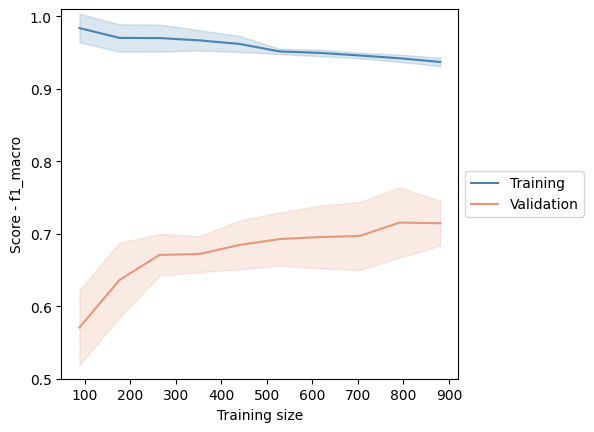

In [14]:
exp.learning_cv(SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='rbf',class_weight='balanced',C=10**0.2))

In [8]:
np.log10(1/51)

-1.7075701760979363

Index(['StandardHours'], dtype='object')


(array([0.0013057 , 0.00435586, 0.00133984, 0.00079235, 0.00128613,
        0.00049637, 0.01299895, 0.00685424, 0.00447815, 0.00251319,
        0.00503022, 0.00464826, 0.00957078, 0.01000465, 0.01068299,
        0.0030216 , 0.0030216 , 0.00748672, 0.00892242, 0.0007791 ,
        0.00313025, 0.00028273, 0.00805749, 0.00033201, 0.00313344,
        0.00248757, 0.00056011, 0.00047297, 0.01392307, 0.01975875,
        0.00023024, 0.00036132, 0.00205601, 0.00548769, 0.00401284,
        0.01050346, 0.06390373, 0.00093225, 0.00047951, 0.01589909,
        0.        , 0.00520293, 0.00842488, 0.00798109, 0.01860541,
        0.00044519, 0.00204705, 0.01069899, 0.0001527 ]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

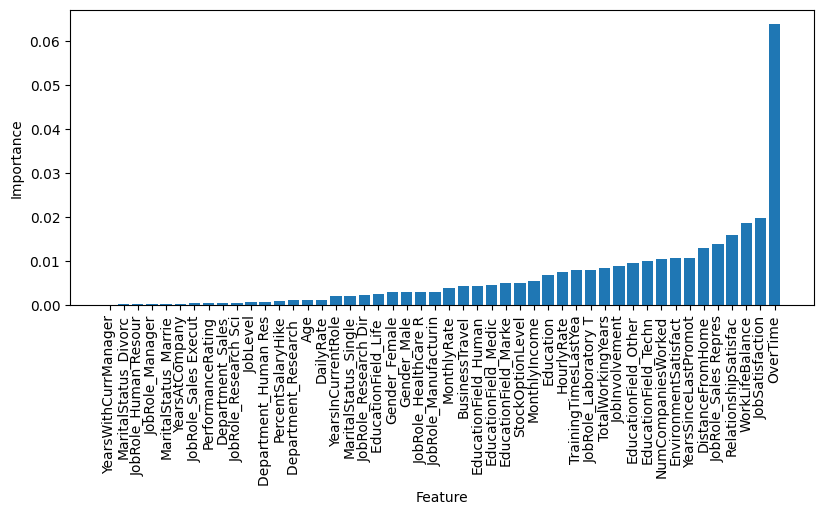

In [15]:
exp.perm_ft_importance(gs_rbf.best_estimator_)

              precision    recall  f1-score   support

           0      0.920     0.932     0.926       308
           1      0.625     0.583     0.603        60

    accuracy                          0.875       368
   macro avg      0.772     0.758     0.765       368
weighted avg      0.872     0.875     0.873       368



{'score': 0.7646273637374861,
 'fit_time': 0.035034894943237305,
 'params': {'C': 1.5848931924611136,
  'break_ties': False,
  'cache_size': 1000,
  'class_weight': 'balanced',
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'rbf',
  'max_iter': 100000000.0,
  'probability': False,
  'random_state': 4,
  'shrinking': True,
  'tol': 1e-06,
  'verbose': False},
 'conf_matr': array([[287,  21],
        [ 25,  35]]),
 'class_rep': {'0': {'precision': 0.9198717948717948,
   'recall': 0.9318181818181818,
   'f1-score': 0.9258064516129032,
   'support': 308},
  '1': {'precision': 0.625,
   'recall': 0.5833333333333334,
   'f1-score': 0.603448275862069,
   'support': 60},
  'accuracy': 0.875,
  'macro avg': {'precision': 0.7724358974358974,
   'recall': 0.7575757575757576,
   'f1-score': 0.7646273637374861,
   'support': 368},
  'weighted avg': {'precision': 0.8717948717948718,
   'recall': 0.875,
   'f1-score': 0.8732480533926584,
   'support

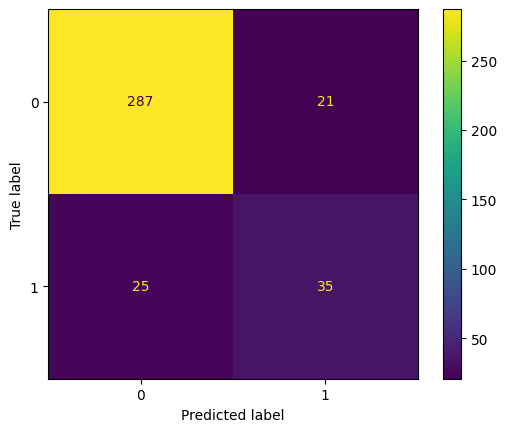

In [16]:
exp.final_test('SVM',SVC(cache_size=1000,max_iter=1e8,tol=1e-6,kernel='rbf',class_weight='balanced',C=10**0.2))

# KNN

Does not distinguish the importance of different features

Tuning <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
---------------------------------
Parameter Name: n_neighbors
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_jobs=-1). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameter: 
	{'n_neighbors': 1}
Best score: 0.580
Tuning <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
---------------------------------
Parameter Name: n_neighbors
Parameter values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_jobs=-1, weights='distance'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighb

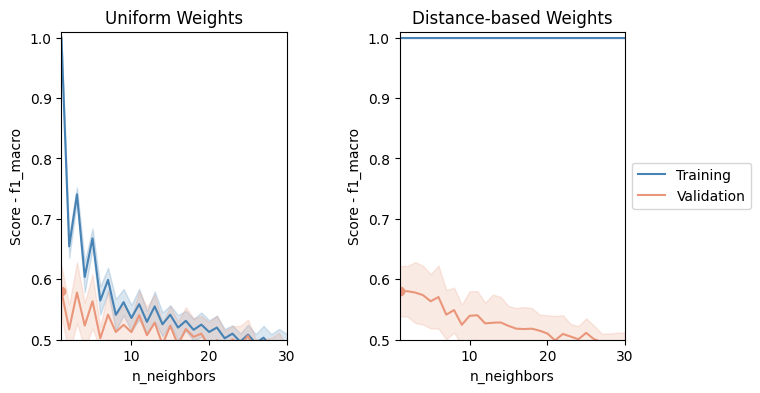

In [7]:
fig, axs=plt.subplots(1,2,figsize=(8,4))

for ax,w in zip(axs,['uniform','distance']):

    gs,_=exp.tune_parameter(estimator=KNeighborsClassifier(n_jobs=-1,weights=w),
        param_name='n_neighbors',
        param_range=np.arange(1,31,1),plot=False
    )

    exp.plot_validation('n_neighbors',np.arange(1,31,1),gs.cv_results_,ax)

axs[0].set_title('Uniform Weights')
axs[1].set_title('Distance-based Weights')
axs[0].get_legend().remove()

Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_neighbors=1, weights='distance'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].
Fitting type(estimator)
--------------------------------------------------
Fit time: 0.001
Score time: 0.004
Final scores (f1_macro):
	 Training 1.000
	 Validation 0.580
Classification report:
              precision    recall  f1-score   support

           0      0.861     0.921     0.890       925
           1      0.348     0.220     0.270       177

    accuracy                          0.809      1102
   macro avg      0.604     0.571     0.580      1102
weighted avg      0.778     0.809     0.790      1102



({'train_sizes': array([ 88, 176, 264, 352, 440, 528, 616, 704, 792, 881]),
  'train_scores': array([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
  'test_scores': array([[0.57253385, 0.58324142, 0.49565293, 0.55216869, 0.64159229],
         [0.63936318, 0.59422738, 0.50620677, 0.59077381, 0.60532845],
         [0.60200193, 0.6041791 , 0.57579487, 0.52337967, 0.59993675],
         [0.62293463, 0.62051346, 0.59773936, 0.5204413 , 0.6566764 ],
         [0.62293463, 0.60602716, 0.55614035, 0.52759884, 0.63045431],
         [0.61857769, 0.61012865, 0.59077381, 0.53063663, 0.65442922],
         [0.62738665, 0.61631944, 0.60281639, 0.51468489, 0.63045431],
         [0.62738665, 0.60200193, 0.54323885, 0.53063663, 0.58696023],
         [0.6

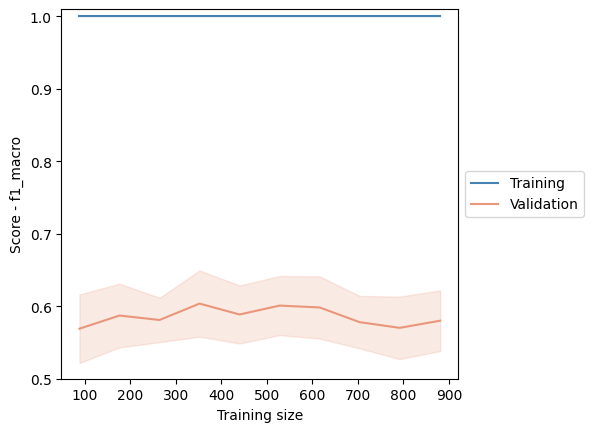

In [9]:
exp.learning_cv(KNeighborsClassifier(n_neighbors=1,weights='distance'))


Invalid parameter 'random_state' for estimator KNeighborsClassifier(n_neighbors=1, weights='distance'). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'].
              precision    recall  f1-score   support

           0      0.863     0.922     0.892       308
           1      0.385     0.250     0.303        60

    accuracy                          0.812       368
   macro avg      0.624     0.586     0.597       368
weighted avg      0.785     0.812     0.796       368



{'score': 0.5973550259264545,
 'fit_time': 0.0006198883056640625,
 'params': {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'metric_params': None,
  'n_jobs': None,
  'n_neighbors': 1,
  'p': 2,
  'weights': 'distance'},
 'conf_matr': array([[284,  24],
        [ 45,  15]]),
 'class_rep': {'0': {'precision': 0.8632218844984803,
   'recall': 0.922077922077922,
   'f1-score': 0.8916797488226059,
   'support': 308},
  '1': {'precision': 0.38461538461538464,
   'recall': 0.25,
   'f1-score': 0.30303030303030304,
   'support': 60},
  'accuracy': 0.8125,
  'macro avg': {'precision': 0.6239186345569324,
   'recall': 0.586038961038961,
   'f1-score': 0.5973550259264545,
   'support': 368},
  'weighted avg': {'precision': 0.78518821603928,
   'recall': 0.8125,
   'f1-score': 0.7957042957042957,
   'support': 368}},
 'estimator': KNeighborsClassifier(n_neighbors=1, weights='distance')}

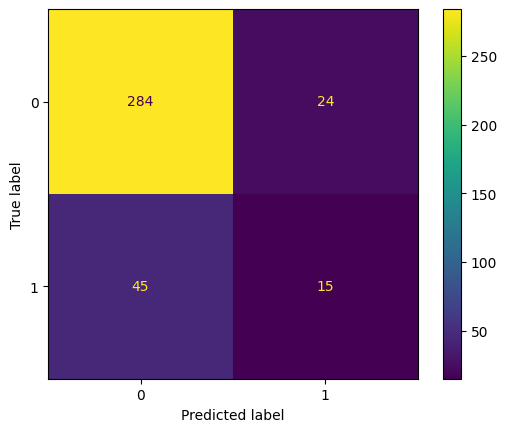

In [30]:
exp.final_test('kNN',KNeighborsClassifier(n_neighbors=1,weights='distance'))

Index(['BusinessTravel', 'DailyRate', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'DistanceFromHome', 'Education', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Technical Degree', 'EnvironmentSatisfaction',
       'Gender_Female', 'Gender_Male', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobSatisfaction', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYear

(array([0.00033577, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00747234, 0.        ,
        0.        , 0.        , 0.00302963, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00168655, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00101348, 0.00338243,
        0.00067155, 0.        , 0.        , 0.        ]),
 <AxesSubplot:xlabel='Feature', ylabel='Importance'>)

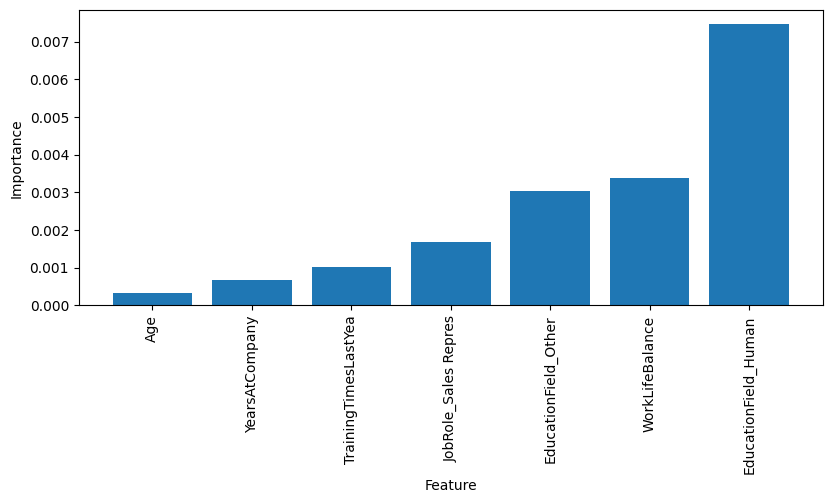

In [31]:
exp.perm_ft_importance(exp.final_result['kNN']['estimator'])

In [37]:
for a in exp.final_result:
    print(f'{a}:\t{exp.final_result[a]["score"]}\t\t\t{exp.final_result[a]["fit_time"]}')

Decision Tree:	0.6320890731717584			0.004380941390991211
Neural Nets:	0.7569811320754718			0.37249088287353516
Boosting:	0.7320591581342435			0.165269136428833
SVM:	0.7575374235715793			0.03452801704406738
kNN:	0.5973550259264545			0.0006198883056640625
